In [14]:
from diffusers import StableDiffusionXLPipeline
from diffusers import DPMSolverMultistepScheduler
import torch

model_name = '/mnt/projects/diffusion_models/sdxl/models/Juggernaut_X_RunDiffusion_Hyper.safetensors'

pipeline = StableDiffusionXLPipeline.from_single_file(model_name, torch_dtype=torch.bfloat16).to('cuda')
scheduler_config = pipeline.scheduler.config
scheduler_config["algorithm_type"] = "sde-dpmsolver++"
pipeline.scheduler = DPMSolverMultistepScheduler.from_config(scheduler_config)

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Some weights of the model checkpoint were not used when initializing CLIPTextModel: 
 ['text_model.embeddings.position_ids']


  0%|          | 0/6 [00:00<?, ?it/s]

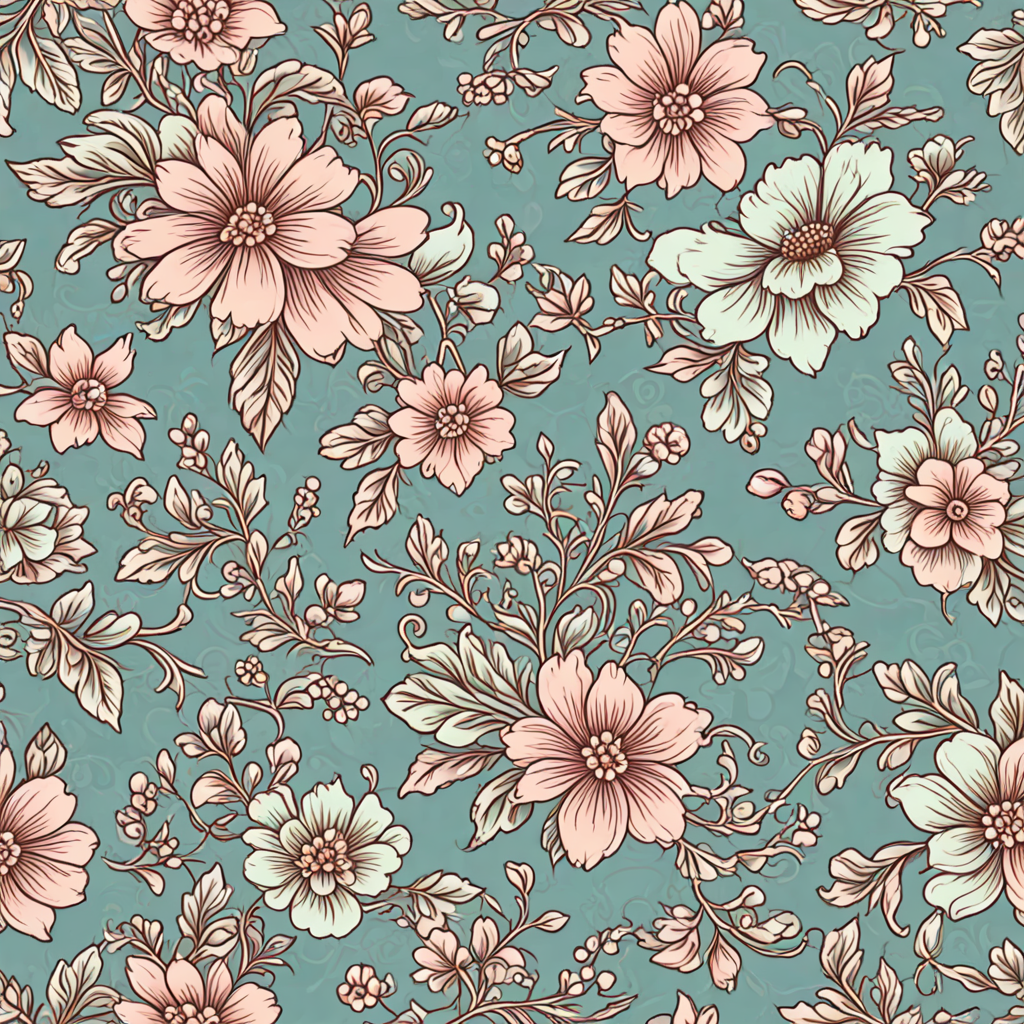

In [42]:
prompt = 'watercolor painting of cat characters and leaves on a white background'
prompt = 'A modern pattern of roses inspired by Piet Mondrian with subtle colors and fine lines.'
prompt = 'Modern pattern with leaves'
prompt = 'simple cartoon pattern, rose, in white background'
prompt = 'watercolor painting of pink flowers and leaves on a white background'
prompt = 'Seamless pattern in minimalist style, simple lines, monochrome palette, and modern design.'
prompt = 'cute cat character, illustration, simple, cartoon, polka'
prompt = 'Create a seamless vector pattern with cute, chibi-style Halloween characters such as a smiling pumpkin, a friendly ghost, and a tiny witch on a broom. Each element should be separate, well- proportioned, and evenly spaced, with pastel colors and simple outlines.'
prompt = 'Seamless pattern in vintage floral style, intricate and delicate, with pastel colors.'

images = pipeline(
    prompt=prompt,
    width=1024,
    height=1024,
    num_inference_steps=6,
    guidance_scale=2,
    num_images_per_prompt=1,
).images

images[0].show()